<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Бинарный-классификатор-голосов" data-toc-modified-id="Бинарный-классификатор-голосов-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Бинарный классификатор голосов</a></span><ul class="toc-item"><li><span><a href="#всякие-установки" data-toc-modified-id="всякие-установки-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>всякие установки</a></span></li><li><span><a href="#всякие-импорты" data-toc-modified-id="всякие-импорты-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>всякие импорты</a></span></li><li><span><a href="#загрузка-датасета" data-toc-modified-id="загрузка-датасета-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>загрузка датасета</a></span></li><li><span><a href="#нейроночки" data-toc-modified-id="нейроночки-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>нейроночки</a></span><ul class="toc-item"><li><span><a href="#обычная-модель" data-toc-modified-id="обычная-модель-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>обычная модель</a></span><ul class="toc-item"><li><span><a href="#датасет" data-toc-modified-id="датасет-1.4.1.1"><span class="toc-item-num">1.4.1.1&nbsp;&nbsp;</span>датасет</a></span></li><li><span><a href="#цикл-тренировки" data-toc-modified-id="цикл-тренировки-1.4.1.2"><span class="toc-item-num">1.4.1.2&nbsp;&nbsp;</span>цикл тренировки</a></span></li><li><span><a href="#проверка-на-тесте" data-toc-modified-id="проверка-на-тесте-1.4.1.3"><span class="toc-item-num">1.4.1.3&nbsp;&nbsp;</span>проверка на тесте</a></span></li><li><span><a href="#резы-на-тесте" data-toc-modified-id="резы-на-тесте-1.4.1.4"><span class="toc-item-num">1.4.1.4&nbsp;&nbsp;</span>резы на тесте</a></span></li></ul></li><li><span><a href="#модель-с-пересекающимися-окнами-для-FFT" data-toc-modified-id="модель-с-пересекающимися-окнами-для-FFT-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>модель с пересекающимися окнами для FFT</a></span><ul class="toc-item"><li><span><a href="#датасет" data-toc-modified-id="датасет-1.4.2.1"><span class="toc-item-num">1.4.2.1&nbsp;&nbsp;</span>датасет</a></span></li><li><span><a href="#цикл" data-toc-modified-id="цикл-1.4.2.2"><span class="toc-item-num">1.4.2.2&nbsp;&nbsp;</span>цикл</a></span></li><li><span><a href="#резы-на-тесте" data-toc-modified-id="резы-на-тесте-1.4.2.3"><span class="toc-item-num">1.4.2.3&nbsp;&nbsp;</span>резы на тесте</a></span></li></ul></li></ul></li><li><span><a href="#тензорборда-и-заключение" data-toc-modified-id="тензорборда-и-заключение-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>тензорборда и заключение</a></span></li></ul></li></ul></div>

# Бинарный классификатор голосов


Задача:  Классификатор мужских и женских голосов на базе LibriTTS

На что мы обращаем внимание при оценке результата:

1 Код 

    структурированный хорошо комментированный и понятный (отделены: предобработка, train/test),
    есть краткое readme: как запустить и какие дополнительные данные использовали

2 Описание результатов:

    Анализ данных
    Выбор метода (Как выбирали?), 
    Описание экспериментов
    Анализ результатов и аргументированные предложения по дальнейшему улучшению


Важно:  мы оцениваем ваше знания и навыки  в ЦОС, ML/DL, программировании и культуре проведения экспериментов. Мы НЕ рекомендуем фокусироваться на больших датасетах и использовании многих GPU. Важнее не показать state-of-the-art результат в плане точности/качества решения, а продемонстрировать решение на разумном датасете и продемонстрировать адекватное решение (при условии заданного датасета и вычислительных мощностей), раскрывающее навыки в постановке задачи обучения, постановке эксперимента и анализе его результатов.


## всякие установки

In [10]:
!pip3 install PySoundFile
!pip3 install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu113
!pip3 install librosa
!pip3 install torchmetrics
!pip3 install json
!pip3 install ipywebrtc


[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip
Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu113

[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


ERROR: Could not find a version that satisfies the requirement json (from versions: none)
ERROR: No matching distribution found for json



[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## всякие импорты

In [11]:
import pandas as pd
import pickle
import numpy as np
import os
import librosa
import torchmetrics
import time
from tqdm.notebook import tqdm
import librosa.display as ld

In [12]:
import torch
import torchaudio
import torchaudio.datasets.libritts as libritts
import pytorch_lightning
from pytorch_lightning import Trainer
from pytorch_lightning.callbacks import ModelCheckpoint, EarlyStopping
from torch.utils.data import DataLoader, IterableDataset, Dataset
torch.__version__, torchaudio.__version__, pytorch_lightning.__version__

('1.10.0+cu113', '0.10.0+cu113', '1.5.10')

## загрузка датасета

In [13]:

l_tts_train = libritts.LIBRITTS(root='.',download=True)
l_tts_train

In [14]:
l_tts_test = libritts.LIBRITTS(root='.',url='test-clean',download=True)
l_tts_test

In [15]:
work_dir='.'
data_path = 'Y:/Documents/projects/libri_tts/freq_imgs'
data_train = os.path.join(data_path , 'train')
data_test = os.path.join(data_path ,'test')
data_train

'Y:/Documents/projects/libri_tts/freq_imgs\\train'

In [16]:
def load_speakers():
    id_to_sex = dict()
    import os
    with open(r'LibriTTS/SPEAKERS.txt', mode='r') as f:
        lines = f.readlines()
    for line in lines[12:]:
        tokens = line.split('|')
        id_to_sex[int(tokens[0])] = 0 if tokens[1].strip() == 'M' else 1
    return id_to_sex


id_2_sex_map = load_speakers()

In [8]:
len(l_tts_train), len(l_tts_test)

(33236, 4837)

In [9]:
first_example = l_tts_train[0]
first_example

(tensor([[-0.0377, -0.0374, -0.0386,  ..., -0.0211, -0.0216, -0.0210]]),
 24000,
 'The Law.',
 'The Law.',
 1034,
 121119,
 '1034_121119_000001_000001')

In [10]:
import IPython.display as ipd
ipd.Audio(first_example[0].numpy(), rate=first_example[1])

In [8]:
def to_freq_imgs(libri_dataset, path: str):
    os.makedirs(path, exist_ok=True)
    for k in tqdm(range(len(libri_dataset))):
        sound = libri_dataset[k]
        spectr = make_spectr(sound[0],
                             sound[1],
                             top_n_freq=TOP_N_FREQ,
                             windows_count=WINDOWS_COUNT)
        img = np.abs(spectr.transpose())
        sex = id_2_sex_map[sound[4]]
        file_name = f"{path}/{TOP_N_FREQ}f_{WINDOWS_COUNT}w_{k}_{sex}.npy"
        if not os.path.exists(file_name):
            with open(file_name, "wb") as f:
                np.save(f, img)

In [11]:
first_example[0].shape

torch.Size([1, 16320])

In [ ]:
# посмотрим на результаты ФФТ
rfft_first_example = np.fft.rfft(first_example[0].numpy())
ld.specshow(np.abs(rfft_first_example),)
rfft_first_example

In [17]:
# делаем спектр из семпла с окнами в кол-ве windows_count без перекрытия
# и с определённым максимальным кол-вом бинов частот top_n_freq
def make_spectr(numpy_signal: np.array,
                signal_rate: int,
                windows_count=1000,
                top_n_freq=4000) -> np.array:
    spectr = np.zeros((windows_count, top_n_freq, 1), dtype=np.cdouble)
    windows_size = int(len(numpy_signal[0]) / windows_count)
    windows = np.zeros((windows_count, 1, len(numpy_signal[0])))
    # print(windows_size)
    for i in range(windows_count):
        # window = np.zeros((1, len(numpy_signal[0])))
        windows[i, 0, i * windows_size:(i + 1) *
                windows_size] = numpy_signal[0, i * windows_size:(i + 1) *
                                             windows_size]
        # windows[i] = window
        # print(window.shape)
    rfft_signals = np.fft.rfft(windows, axis=2)
    # print(rfft_signal.shape, rfft_signal)
    spectr = rfft_signals[:, :, :top_n_freq]
    return spectr.transpose(0, 2, 1)

In [15]:
spectr = make_spectr(l_tts_train[1][0].numpy(), l_tts_train[1][1], windows_count=300, top_n_freq=20000)
spectr.shape

(300, 20000, 1)

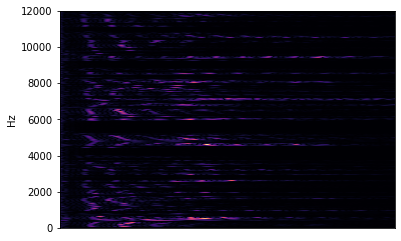

In [16]:
ld.specshow(np.abs(spectr.reshape(spectr.shape[:2])), y_axis='fft', sr=l_tts_train[1][1])

In [18]:
WINDOWS_COUNT = 300 # количество окон, на которые разбивается семлп
TOP_N_FREQ = 1000 # только первые 1000 бинов частот из fft преобразования
TRAIN_SET_SIZE = 15000 # возьмём только половину датасета
VALID_SET_SIZE = 2000 

In [241]:
y = np.array([id_2_sex_map[s[4]] for s in tqdm(l_tts_train)])
y

  0%|          | 0/33236 [00:00<?, ?it/s]

array([0, 0, 0, ..., 0, 0, 0])

In [244]:
# поскольку классы сбалансированы не будем мучаться с весами семплов или ещё какими-нибудь приседаниями
(y == 1).sum(), len(y)


(17629, 33236)

In [29]:
idxs = np.arange(TRAIN_SET_SIZE + VALID_SET_SIZE)
np.random.seed(42)
np.random.shuffle(idxs)

valid_idxs = idxs[:VALID_SET_SIZE]
train_idxs = idxs[VALID_SET_SIZE:VALID_SET_SIZE + TRAIN_SET_SIZE]
test_idxs = np.arange(len(l_tts_test))
len(train_idxs), len(valid_idxs), len(test_idxs)

(15000, 2000, 4837)

## нейроночки

### обычная модель

In [19]:
EPOCHS = 50
BATCH_SIZE = 256

In [20]:
def make_model():
    model = torch.nn.Sequential(
        torch.nn.Conv2d(1, 15, kernel_size=(3,3), stride=2, padding_mode='zeros'),
        torch.nn.MaxPool2d(kernel_size=(3,3), stride=2),
        torch.nn.LeakyReLU(),
        torch.nn.Conv2d(15, 45, kernel_size=(5,5), stride=2, padding_mode='zeros'),
        torch.nn.MaxPool2d(kernel_size=(5,5), stride=2),
        torch.nn.LeakyReLU(),
        torch.nn.Conv2d(45, 65, kernel_size=(5,5), stride=2, padding_mode='zeros'),
        torch.nn.MaxPool2d(kernel_size=(5,5), stride=2),
        torch.nn.LeakyReLU(),
        torch.nn.Flatten(),
        torch.nn.Linear(780, 1),
        torch.nn.Sigmoid()
    )
    return model.cuda()

In [21]:
class Model(pytorch_lightning.LightningModule):
    def __init__(self):
        super().__init__()
        self.model = make_model()
        self.loss = torch.nn.BCELoss()
        self.train_acc = torchmetrics.Accuracy()
        self.valid_acc = torchmetrics.Accuracy()

    def forward(self, x):
        return self.model(x)

    def training_step(self, batch, batch_idx):
        x, y = batch
        y_h = self.model(x)
        l = self.loss(y_h, y[:, None])
        self.train_acc(y_h, y[:, None].int())
        self.log('train_acc', self.train_acc,prog_bar=True, on_step=True, on_epoch=False)
        return l


    def validation_step(self, batch, batch_idx):
        x, y = batch
        y_h = self.model(x)
        l = self.loss(y_h, y[:, None])
        self.valid_acc(y_h, y[:, None].int())
        self.log('valid_acc', self.valid_acc,prog_bar=True, on_step=True, on_epoch=True)
        self.log('valid_loss', l.item(), on_step=True, on_epoch=True)
        return l

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.model.parameters(),
                                lr=1e-3,
                                betas=(0.9, 0.999),
                                eps=1e-5)
        scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1)
        return [optimizer], [{"scheduler": scheduler, "interval": "epoch"}]

#### датасет

In [64]:
class LibriDataset(Dataset):
    def __init__(self, libri_dataset, idxs: list, path: str):
        self.libri_dataset = libri_dataset
        self.idxs = idxs
        self.path = path

    def __len__(self):
        return len(self.idxs)

    def __getitem__(self, index):
        random_index = self.idxs[index]
        if not (os.path.exists(
                f"{self.path}/{TOP_N_FREQ}f_{WINDOWS_COUNT}w_{random_index}_0.npy"
        ) or os.path.exists(
                f"{self.path}/{TOP_N_FREQ}f_{WINDOWS_COUNT}w_{random_index}_1.npy"
        )):
            sound = self.libri_dataset[random_index]
            spectr = make_spectr(sound[0],
                                 sound[1],
                                 top_n_freq=TOP_N_FREQ,
                                 windows_count=WINDOWS_COUNT)
            img = np.abs(spectr.transpose())
            sex = id_2_sex_map[sound[4]]
            file_name = f"{self.path}/{TOP_N_FREQ}f_{WINDOWS_COUNT}w_{random_index}_{sex}.npy"
            with open(file_name, "wb") as f:
                np.save(f, img)
        else:
            file_name = f"{self.path}/{TOP_N_FREQ}f_{WINDOWS_COUNT}w_{random_index}_0.npy"
            if os.path.exists(file_name):
                with open(file_name, "rb") as f:
                    img = np.load(f, allow_pickle=True)
                    sex = 0
            else:
                file_name = f"{self.path}/{TOP_N_FREQ}f_{WINDOWS_COUNT}w_{random_index}_1.npy"
                if os.path.exists(file_name):
                    with open(file_name, "rb") as f:
                        img = np.load(f, allow_pickle=True)
                        sex = 1

        return torch.tensor(img).float().cuda(), torch.tensor(
            sex).float().cuda()


train_dataloader = DataLoader(LibriDataset(l_tts_train, train_idxs,
                                            data_train),
                              batch_size=BATCH_SIZE,
                              num_workers=0,
                              shuffle=True)
valid_dataloader = DataLoader(LibriDataset(l_tts_train, valid_idxs,
                                            data_train),
                              num_workers=0,
                              batch_size=BATCH_SIZE)

#### цикл тренировки

In [35]:
early_stop_callback = EarlyStopping(monitor='valid_loss',
                                    min_delta=0.001,
                                    patience=30,
                                    verbose=True,
                                    mode='min')
val_loss_checkpoint = ModelCheckpoint(monitor='valid_loss',
                                      dirpath=work_dir +
                                      './models/',
                                      filename='{epoch:02d}-{valid_loss:.4f}',
                                      save_top_k=1,
                                      verbose=True,
                                      mode='min')

In [36]:
model = Model()
trainer = Trainer(max_epochs=EPOCHS, gpus=1 , callbacks=[early_stop_callback, val_loss_checkpoint],)# resume_from_checkpoint=work_dir+'./pytorch_models/*' )
trainer.fit(model=model, train_dataloader=train_dataloader, val_dataloaders=valid_dataloader)
f"best checkpoint path {val_loss_checkpoint.best_model_path}"    

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
d:\users\eskander\venv\yet_another_env\lib\site-packages\pytorch_lightning\trainer\trainer.py:736: LightningDeprecationWarning: `trainer.fit(train_dataloader)` is deprecated in v1.4 and will be removed in v1.6. Use `trainer.fit(train_dataloaders)` instead. HINT: added 's'
  "`trainer.fit(train_dataloader)` is deprecated in v1.4 and will be removed in v1.6."
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type       | Params
-----------------------------------------
0 | model     | Sequential | 91.0 K
1 | loss      | BCELoss    | 0     
2 | train_acc | Accuracy   | 0     
3 | valid_acc | Accuracy   | 0     
-----------------------------------------
91.0 K    Trainable params
0         Non-trainable params
91.0 K    Total params
0.364     Total estimated model params size (MB)
d:\users\eskander\venv\yet_another_env\lib\site-packages\pytorch_lightning\callbacks\model_che

Validation sanity check: 0it [00:00, ?it/s]

d:\users\eskander\venv\yet_another_env\lib\site-packages\pytorch_lightning\trainer\data_loading.py:133: UserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  f"The dataloader, {name}, does not have many workers which may be a bottleneck."
d:\users\eskander\venv\yet_another_env\lib\site-packages\pytorch_lightning\trainer\data_loading.py:133: UserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  f"The dataloader, {name}, does not have many workers which may be a bottleneck."


Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric valid_loss improved. New best score: 0.586
Epoch 0, global step 58: valid_loss reached 0.58640 (best 0.58640), saving model to "Z:\Documents\projects\science\models\epoch=00-valid_loss=0.5864.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Metric valid_loss improved by 0.055 >= min_delta = 0.001. New best score: 0.531
Epoch 1, global step 117: valid_loss reached 0.53096 (best 0.53096), saving model to "Z:\Documents\projects\science\models\epoch=01-valid_loss=0.5310.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 2, global step 176: valid_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Metric valid_loss improved by 0.017 >= min_delta = 0.001. New best score: 0.514
Epoch 3, global step 235: valid_loss reached 0.51366 (best 0.51366), saving model to "Z:\Documents\projects\science\models\epoch=03-valid_loss=0.5137.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 4, global step 294: valid_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 5, global step 353: valid_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Metric valid_loss improved by 0.021 >= min_delta = 0.001. New best score: 0.493
Epoch 6, global step 412: valid_loss reached 0.49266 (best 0.49266), saving model to "Z:\Documents\projects\science\models\epoch=06-valid_loss=0.4927.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Metric valid_loss improved by 0.008 >= min_delta = 0.001. New best score: 0.484
Epoch 7, global step 471: valid_loss reached 0.48436 (best 0.48436), saving model to "Z:\Documents\projects\science\models\epoch=07-valid_loss=0.4844.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 8, global step 530: valid_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 9, global step 589: valid_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 10, global step 648: valid_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 11, global step 707: valid_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 12, global step 766: valid_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 13, global step 825: valid_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 14, global step 884: valid_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 15, global step 943: valid_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 16, global step 1002: valid_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 17, global step 1061: valid_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 18, global step 1120: valid_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 19, global step 1179: valid_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 20, global step 1238: valid_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 21, global step 1297: valid_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 22, global step 1356: valid_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 23, global step 1415: valid_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 24, global step 1474: valid_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 25, global step 1533: valid_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 26, global step 1592: valid_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 27, global step 1651: valid_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 28, global step 1710: valid_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 29, global step 1769: valid_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 30, global step 1828: valid_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 31, global step 1887: valid_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 32, global step 1946: valid_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 33, global step 2005: valid_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 34, global step 2064: valid_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 35, global step 2123: valid_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 36, global step 2182: valid_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Monitored metric valid_loss did not improve in the last 30 records. Best score: 0.484. Signaling Trainer to stop.
Epoch 37, global step 2241: valid_loss was not in top 1


'best checkpoint path Z:\\Documents\\projects\\science\\models\\epoch=07-valid_loss=0.4844.ckpt'

#### проверка на тесте

In [30]:

test_idxs = np.arange(VALID_SET_SIZE + TRAIN_SET_SIZE, VALID_SET_SIZE + TRAIN_SET_SIZE + 3000)

test_dataloader = DataLoader(LibriDataset(l_tts_train, test_idxs,
                                            data_train),
                              num_workers=0,
                              batch_size=BATCH_SIZE)

In [69]:
# model.load_from_checkpoint(val_loss_checkpoint.best_model_path)
model = Model()
model.load_state_dict(torch.load('Z:\\Documents\\projects\\science\\huawey\\models\\epoch=07-valid_loss=0.4844.ckpt')['state_dict'])
model = model.cuda()

In [70]:
with torch.no_grad():
    y_tests = []
    y_test_preds = []
    for x_test, y_test in tqdm(LibriDataset(l_tts_train, test_idxs,
                                                data_train)):
        y_tests.append(y_test.item())
        y_test_preds.append(model.forward(x_test.unsqueeze(0).cuda()).item())
        


  0%|          | 0/3000 [00:00<?, ?it/s]

#### резы на тесте

In [71]:
# средняя точность на тесте
((np.array(y_test_preds) > 0.5).astype(int) == np.array(y_tests)).mean()

0.7266666666666667

не бог весть что, но всё же. Есть идея резать на окна не дуболомно, а с перекрытием. Этим и займёмся.

### модель с пересекающимися окнами для FFT

In [ ]:
def make_overlapped_spectr(numpy_signal: np.array,
                           signal_rate: int,
                           windows_count=1000,
                           overlapping_area=0.5,
                           top_n_freq=4000) -> np.array:
    spectr = np.zeros((windows_count, top_n_freq, 1), dtype=np.cdouble)
    windows_size = int(len(numpy_signal[0]) / windows_count)
    windows = np.zeros((windows_count, 1, len(numpy_signal[0])))
    
    for i in range(windows_count):
        
        left_border = i * windows_size
        right_border = (i + 1) * windows_size
        if i > 0:
            left_border -= int(windows_size * overlapping_area / 2)
            right_border += int(windows_size * overlapping_area / 2)

        windows[i, 0, left_border:right_border] = numpy_signal[0, left_border:right_border]
        
    rfft_signals = np.fft.rfft(windows, axis=2)
    
    spectr = rfft_signals[:, :, :top_n_freq]
    return spectr.transpose(0, 2, 1)

In [350]:
spectr = make_overlapped_spectr(l_tts_train[1][0].numpy(), l_tts_train[1][1], windows_count=300, top_n_freq=20000)
spectr.shape

(300, 20000, 1)

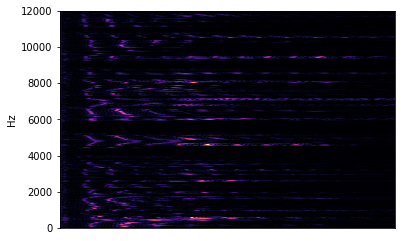

In [352]:
ld.specshow(np.abs(spectr.reshape(spectr.shape[:2])), y_axis='fft', sr=l_tts_train[1][1])

#### датасет

In [23]:
class OverlappedLibriDataset(LibriDataset):
    def __init__(self, libri_dataset, idxs: list, path: str):
        super().__init__(libri_dataset, idxs, path)

    def __getitem__(self, index):
        random_index = self.idxs[index]
        if not (os.path.exists(
                f"{self.path}/{TOP_N_FREQ}f_{WINDOWS_COUNT}w_{random_index}_0.npy"
        ) or os.path.exists(
                f"{self.path}/{TOP_N_FREQ}f_{WINDOWS_COUNT}w_{random_index}_1.npy"
        )):
            sound = self.libri_dataset[random_index]
            spectr = make_overlapped_spectr(sound[0],
                                            sound[1],
                                            top_n_freq=TOP_N_FREQ,
                                            windows_count=WINDOWS_COUNT)
            img = np.abs(spectr.transpose())
            sex = id_2_sex_map[sound[4]]
            file_name = f"{self.path}/{TOP_N_FREQ}f_{WINDOWS_COUNT}w_{random_index}_{sex}.npy"
            with open(file_name, "wb") as f:
                np.save(f, img)
        else:
            file_name = f"{self.path}/{TOP_N_FREQ}f_{WINDOWS_COUNT}w_{random_index}_0.npy"
            if os.path.exists(file_name):
                with open(file_name, "rb") as f:
                    img = np.load(f, allow_pickle=True)
                    sex = 0
            else:
                file_name = f"{self.path}/{TOP_N_FREQ}f_{WINDOWS_COUNT}w_{random_index}_1.npy"
                if os.path.exists(file_name):
                    with open(file_name, "rb") as f:
                        img = np.load(f, allow_pickle=True)
                        sex = 1

        return torch.tensor(img).float().cuda(), torch.tensor(
            sex).float().cuda()


In [44]:
BATCH_SIZE = 256

data_train_overlapped_path = os.path.join(data_path, 'overlapped', 'train')
os.makedirs(data_train_overlapped_path, exist_ok=True)
print(data_train_overlapped_path)
overlapped_train_dataloader = DataLoader(OverlappedLibriDataset(
    l_tts_train, train_idxs, data_train_overlapped_path),
                                         batch_size=BATCH_SIZE,
                                         num_workers=0,
                                         shuffle=True)
overlapped_valid_dataloader = DataLoader(OverlappedLibriDataset(
    l_tts_train, valid_idxs, data_train_overlapped_path),
                                         num_workers=0,
                                         batch_size=BATCH_SIZE)

Y:/Documents/projects/libri_tts/freq_imgs\overlapped\train


#### цикл 

In [45]:
overlapped_early_stop_callback = EarlyStopping(monitor='valid_loss',
                                    min_delta=0.001,
                                    patience=30,
                                    verbose=True,
                                    mode='min')
overlapped_val_loss_checkpoint = ModelCheckpoint(
    monitor='valid_loss',
    dirpath=work_dir + './overlapped_models/',
    filename='{epoch:02d}-{valid_loss:.4f}',
    save_top_k=1,
    verbose=True,
    mode='min')

overlapped_model = Model()

trainer = Trainer(
    max_epochs=EPOCHS,
    gpus=1,
    callbacks=[overlapped_early_stop_callback, overlapped_val_loss_checkpoint],
)  # resume_from_checkpoint=work_dir+'./pytorch_models/*' )
trainer.fit(model=overlapped_model,
            train_dataloader=overlapped_train_dataloader,
            val_dataloaders=overlapped_valid_dataloader)
f"best checkpoint path {overlapped_val_loss_checkpoint.best_model_path}"

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type       | Params
-----------------------------------------
0 | model     | Sequential | 91.0 K
1 | loss      | BCELoss    | 0     
2 | train_acc | Accuracy   | 0     
3 | valid_acc | Accuracy   | 0     
-----------------------------------------
91.0 K    Trainable params
0         Non-trainable params
91.0 K    Total params
0.364     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric valid_loss improved. New best score: 0.613
Epoch 0, global step 58: valid_loss reached 0.61291 (best 0.61291), saving model to "Z:\Documents\projects\science\overlapped_models\epoch=00-valid_loss=0.6129.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Metric valid_loss improved by 0.040 >= min_delta = 0.001. New best score: 0.573
Epoch 1, global step 117: valid_loss reached 0.57260 (best 0.57260), saving model to "Z:\Documents\projects\science\overlapped_models\epoch=01-valid_loss=0.5726.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Metric valid_loss improved by 0.042 >= min_delta = 0.001. New best score: 0.531
Epoch 2, global step 176: valid_loss reached 0.53062 (best 0.53062), saving model to "Z:\Documents\projects\science\overlapped_models\epoch=02-valid_loss=0.5306.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 3, global step 235: valid_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Metric valid_loss improved by 0.021 >= min_delta = 0.001. New best score: 0.510
Epoch 4, global step 294: valid_loss reached 0.50971 (best 0.50971), saving model to "Z:\Documents\projects\science\overlapped_models\epoch=04-valid_loss=0.5097.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 5, global step 353: valid_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 6, global step 412: valid_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Metric valid_loss improved by 0.008 >= min_delta = 0.001. New best score: 0.501
Epoch 7, global step 471: valid_loss reached 0.50123 (best 0.50123), saving model to "Z:\Documents\projects\science\overlapped_models\epoch=07-valid_loss=0.5012.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 8, global step 530: valid_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 9, global step 589: valid_loss reached 0.50048 (best 0.50048), saving model to "Z:\Documents\projects\science\overlapped_models\epoch=09-valid_loss=0.5005.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Metric valid_loss improved by 0.003 >= min_delta = 0.001. New best score: 0.499
Epoch 10, global step 648: valid_loss reached 0.49863 (best 0.49863), saving model to "Z:\Documents\projects\science\overlapped_models\epoch=10-valid_loss=0.4986.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Metric valid_loss improved by 0.009 >= min_delta = 0.001. New best score: 0.489
Epoch 11, global step 707: valid_loss reached 0.48917 (best 0.48917), saving model to "Z:\Documents\projects\science\overlapped_models\epoch=11-valid_loss=0.4892.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 12, global step 766: valid_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Metric valid_loss improved by 0.006 >= min_delta = 0.001. New best score: 0.483
Epoch 13, global step 825: valid_loss reached 0.48336 (best 0.48336), saving model to "Z:\Documents\projects\science\overlapped_models\epoch=13-valid_loss=0.4834.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 14, global step 884: valid_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Metric valid_loss improved by 0.001 >= min_delta = 0.001. New best score: 0.482
Epoch 15, global step 943: valid_loss reached 0.48221 (best 0.48221), saving model to "Z:\Documents\projects\science\overlapped_models\epoch=15-valid_loss=0.4822.ckpt" as top 1


Validating: 0it [00:00, ?it/s]

Epoch 16, global step 1002: valid_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 17, global step 1061: valid_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 18, global step 1120: valid_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 19, global step 1179: valid_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 20, global step 1238: valid_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 21, global step 1297: valid_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 22, global step 1356: valid_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 23, global step 1415: valid_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 24, global step 1474: valid_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 25, global step 1533: valid_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 26, global step 1592: valid_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 27, global step 1651: valid_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 28, global step 1710: valid_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 29, global step 1769: valid_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 30, global step 1828: valid_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 31, global step 1887: valid_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 32, global step 1946: valid_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 33, global step 2005: valid_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 34, global step 2064: valid_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 35, global step 2123: valid_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 36, global step 2182: valid_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 37, global step 2241: valid_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 38, global step 2300: valid_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 39, global step 2359: valid_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 40, global step 2418: valid_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 41, global step 2477: valid_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 42, global step 2536: valid_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 43, global step 2595: valid_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Epoch 44, global step 2654: valid_loss was not in top 1


Validating: 0it [00:00, ?it/s]

Monitored metric valid_loss did not improve in the last 30 records. Best score: 0.482. Signaling Trainer to stop.
Epoch 45, global step 2713: valid_loss was not in top 1


'best checkpoint path Z:\\Documents\\projects\\science\\overlapped_models\\epoch=15-valid_loss=0.4822.ckpt'

In [53]:
overlapped_val_loss_checkpoint.best_model_path

'Z:\\Documents\\projects\\science\\overlapped_models\\epoch=15-valid_loss=0.4822.ckpt'

In [57]:
overlapped_model = Model()
overlapped_model.load_state_dict(torch.load(overlapped_val_loss_checkpoint.best_model_path)['state_dict'])
overlapped_model = overlapped_model.cuda()

#### резы на тесте

In [59]:
with torch.no_grad():
    y_tests = []
    y_test_preds = []
    for x_test, y_test in tqdm(OverlappedLibriDataset(l_tts_train, test_idxs,
                                                data_train_overlapped_path)):
        y_tests.append(y_test.item())
        y_test_preds.append(overlapped_model.forward(x_test.unsqueeze(0)).item())
        
# средняя точность на тесте
((np.array(y_test_preds) > 0.5).astype(int) == np.array(y_tests)).mean()

  0%|          | 0/3000 [00:00<?, ?it/s]

0.7373333333333333

In [40]:
(np.array(y_test_preds) > 0.5).astype(int)

array([0, 0, 0, ..., 0, 0, 0])

In [63]:
np.array(y_tests).mean() # классы более менее сболансированны, так что можно обойтись accuracy

0.609

На удивление модель с перекрытием окна дала результат чуть лучше +1% по accuracy.


## тензорборда и заключение

1. **melspec** не стал использовать так как хотелось разобраться как оно работает, и если честно не успел разобраться. А просто в **librosa** вызвать **librosa.feature.melspectrogram** рука не поднялась.

2. на удивление перекрытые окна для ффт не обучились от слова совсем, может был какой баг но я не нашёл. Перекрывающиеся окно как-то тоже можно было сделать через **librosa.core.spectrum.util.frame**, но хотелось досконально разобраться, может что и получилось. 

3. кажется можно было нормальзовать амплитуды на входе в нейронку, но заморачиваться я не стал, в конце концов так делают чтобы различные по характеристикам фичи влияли одинакого, а в моём случае все фичи были одной природы

4. стоит обучиться на всё датасете, но преобразования у меня слишком громоздкие, и делаются долго, а на windows num_workers в даталоадерах странно работают. Да и я по срокам уже завалил. Так что времени уже нет.

In [32]:
!pip3 freeze > requirements.txt

In [8]:
%load_ext tensorboard
%tensorboard --logdir lightning_logs/  --port=8008


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


версия 15 это с перекрывающимися окнами. 14 это обычная. 